## Predictive Analysis for Optimizing Kalamansi Growth using Logistic Regression
Logistic regression is a classification method ideally suited to predict binary outcomes – in this case, whether a kalamansi fruit quality will grow in high quality or not and whether the kalamansi has infected to a disease. Unlike linear regression, which focuses on continuous variables, logistic regression excels at modeling categorical outcomes. Using logistic regression, we can harness a range of factors to improve our understanding of kalamansi cultivation.

### Agenda
* About Dataset
* Loading Libraries
* Loading Data
* Understanding Data
* Exploratory Data Analysis
* Splitting the data
* Building Model
* Prediction
* Model Performance

### About Dataset 
#### Kalamansi Quality
The dataset of kalamansi quality has 14 columns - kalamansi_id, size, shape, firmness, skin_color, blemishes, soil_type, sun_exposure, location, fertilized, watering_sched, pruning, pest_presence, and quality. If quality = 1, the kalamansi has high quality and if quality = 0, the kalamansi has poor quality.

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

### Loading Data

In [2]:
url = 'C:/Users/Benneth/Documents/Jupyter/kalamansi_dataset.csv'
kalamansi= pd.read_csv(url, header = 0, index_col = 0)

### Understanding Data
Let's check how our data looks. This can be done using head() method, displaying only 5 data.



In [3]:
kalamansi.head()

,size,shape,firmness,skin_color,blemishes,soil_type,sun_exposure,location,fertilized,watering_sched,pruning,pest_prescence,quality
kalamansi_id,,,,,,,,,,,,,
0,small,oblong,flabby,mixed,not present,clayey,full shade,patio,not fertilized,regular,regular,yes,low
1,medium,spherical,firm,dull yellow,not present,loamy,full sun,patio,fertilized,regular,regular,no,high
2,small,oblong,flabby,bright green,not present,clayey,partial shade,balcony,not fertilized,regular,not regular,yes,low
3,medium,spherical,firm,mixed,not present,sandy,full sun,rooftop,fertilized,irregular,regular,no,high
4,small,spherical,firm,bright green,present,clayey,full shade,balcony,not fertilized,irregular,regular,no,low


There are 14 columns in total:
Independent variables (Predictors):
* kalamansi_id - refers to unique id of each kalamansi
* size - small, medium, or large (Ordinal)
* firmness - flabby or firm
* shape - oblong or spherical
* skin_color - dull yellow, bright green, mixed
* blemishes - present or not present
* soil_type - clayey, loamy, sandy
* sun_exposure - full shade, partial shade, full sun
* location - patio, balcony, rooftop
* fertilized - fertilized or not fertilized
* watering sched - regular or irregular
* pruning - regular or irregular 
* pest_presence - present or not present (yes/no)

Dependent variable:
* quality - high or low quality

#### Converting all columns to numerical value

In [4]:
#First, let's convert all the binary variables 
firm_mapping = {'flabby': 0, 'firm': 1}
shape_mapping = {'oblong': 0, 'spherical': 1}
blemishes_mapping = {'not present': 0, 'present': 1}
fertilized_mapping = {'not fertilized': 0, 'fertilized': 1}
watering_mapping = {'irregular': 0, 'regular': 1}
pruning_mapping = {'not regular': 0, 'regular': 1}
pest_mapping = {'no': 0, 'yes': 1}
quality_mapping = {'low': 0, 'high': 1}

# Apply mappings using lambda functions
kalamansi['fruit_firmness'] = kalamansi['firmness'].apply(lambda x: firm_mapping[x])
kalamansi['fruit_shape'] = kalamansi['shape'].apply(lambda x: shape_mapping[x])
kalamansi['fruit_blemishes'] = kalamansi['blemishes'].apply(lambda x: blemishes_mapping[x])
kalamansi['fertilizer'] = kalamansi['fertilized'].apply(lambda x: fertilized_mapping[x])
kalamansi['water_sched'] = kalamansi['watering_sched'].apply(lambda x: watering_mapping[x])
kalamansi['fruit_pruning'] = kalamansi['pruning'].apply(lambda x: pruning_mapping[x])
kalamansi['pest'] = kalamansi['pest_prescence'].apply(lambda x: pest_mapping[x])
kalamansi['kalamansi_quality'] = kalamansi['quality'].apply(lambda x: quality_mapping[x])

In [5]:
kalamansi.head()

,size,shape,firmness,skin_color,blemishes,soil_type,sun_exposure,location,fertilized,watering_sched,...,pest_prescence,quality,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality
kalamansi_id,,,,,,,,,,,,,,,,,,,,,
0,small,oblong,flabby,mixed,not present,clayey,full shade,patio,not fertilized,regular,...,yes,low,0,0,0,0,1,1,1,0
1,medium,spherical,firm,dull yellow,not present,loamy,full sun,patio,fertilized,regular,...,no,high,1,1,0,1,1,1,0,1
2,small,oblong,flabby,bright green,not present,clayey,partial shade,balcony,not fertilized,regular,...,yes,low,0,0,0,0,1,0,1,0
3,medium,spherical,firm,mixed,not present,sandy,full sun,rooftop,fertilized,irregular,...,no,high,1,1,0,1,0,1,0,1
4,small,spherical,firm,bright green,present,clayey,full shade,balcony,not fertilized,irregular,...,no,low,1,1,1,0,0,1,0,0


In [6]:
#Drop all the categorical binary columns

binary_columns = ['firmness','shape', 'blemishes', 'fertilized', 'watering_sched', 'pruning', 'pest_prescence', 'quality']
kalamansi = kalamansi.drop(binary_columns, axis=1)

In [7]:
kalamansi.head()

,size,skin_color,soil_type,sun_exposure,location,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality
kalamansi_id,,,,,,,,,,,,,
0,small,mixed,clayey,full shade,patio,0,0,0,0,1,1,1,0
1,medium,dull yellow,loamy,full sun,patio,1,1,0,1,1,1,0,1
2,small,bright green,clayey,partial shade,balcony,0,0,0,0,1,0,1,0
3,medium,mixed,sandy,full sun,rooftop,1,1,0,1,0,1,0,1
4,small,bright green,clayey,full shade,balcony,1,1,1,0,0,1,0,0


In [8]:
#Lastly, convert all the columns that have multiple variables

size_mapping = {'small': 0, 'medium': 1, 'big': 2}
color_mapping = {'dull yellow': 0, 'bright green': 1, 'mixed': 2}
soil_mapping = {'loamy': 0, 'clayey': 1, 'sandy': 2}
sun_mapping = {'full shade': 0, 'partial shade': 1, 'full sun': 2}
location_mapping = {'patio': 0, 'balcony': 1, 'rooftop': 2}

# Apply mappings using lambda functions
kalamansi['fruit_size'] = kalamansi['size'].apply(lambda x: size_mapping[x])
kalamansi['fruit_color'] = kalamansi['skin_color'].apply(lambda x: color_mapping[x])
kalamansi['soil'] = kalamansi['soil_type'].apply(lambda x: soil_mapping[x])
kalamansi['sun_expo'] = kalamansi['sun_exposure'].apply(lambda x: sun_mapping[x])
kalamansi['loc'] = kalamansi['location'].apply(lambda x: location_mapping[x])

In [9]:
kalamansi.head()

,size,skin_color,soil_type,sun_exposure,location,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality,fruit_size,fruit_color,soil,sun_expo,loc
kalamansi_id,,,,,,,,,,,,,,,,,,
0,small,mixed,clayey,full shade,patio,0,0,0,0,1,1,1,0,0,2,1,0,0
1,medium,dull yellow,loamy,full sun,patio,1,1,0,1,1,1,0,1,1,0,0,2,0
2,small,bright green,clayey,partial shade,balcony,0,0,0,0,1,0,1,0,0,1,1,1,1
3,medium,mixed,sandy,full sun,rooftop,1,1,0,1,0,1,0,1,1,2,2,2,2
4,small,bright green,clayey,full shade,balcony,1,1,1,0,0,1,0,0,0,1,1,0,1


In [10]:
#Drop all the multiple values columns

multiple_columns = ['size', 'skin_color', 'soil_type', 'sun_exposure', 'location']
kalamansi = kalamansi.drop(multiple_columns, axis=1)

In [11]:
kalamansi.head()

,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality,fruit_size,fruit_color,soil,sun_expo,loc
kalamansi_id,,,,,,,,,,,,,
0,0,0,0,0,1,1,1,0,0,2,1,0,0
1,1,1,0,1,1,1,0,1,1,0,0,2,0
2,0,0,0,0,1,0,1,0,0,1,1,1,1
3,1,1,0,1,0,1,0,1,1,2,2,2,2
4,1,1,1,0,0,1,0,0,0,1,1,0,1


In [12]:
#Stats: total count, mean, standard deviation, minimum, percentile 25, 50, 75, and maximum
kalamansi.describe()

,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality,fruit_size,fruit_color,soil,sun_expo,loc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.766667,0.566667,0.366667,0.566667,0.600000,0.733333,0.400000,0.333333,0.900000,0.966667,0.966667,1.333333,0.966667
std,0.430183,0.504007,0.490133,0.504007,0.498273,0.449776,0.498273,0.479463,0.758856,0.927857,0.850287,0.758098,0.850287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000


#### Check for missing values

In [13]:
kalamansi.isnull().sum()

fruit_firmness       0
fruit_shape          0
fruit_blemishes      0
fertilizer           0
water_sched          0
fruit_pruning        0
pest                 0
kalamansi_quality    0
fruit_size           0
fruit_color          0
soil                 0
sun_expo             0
loc                  0
dtype: int64

### Exploratory Data Analysis
Univariate Analysis using Bar Chart (Frequency Distribution)

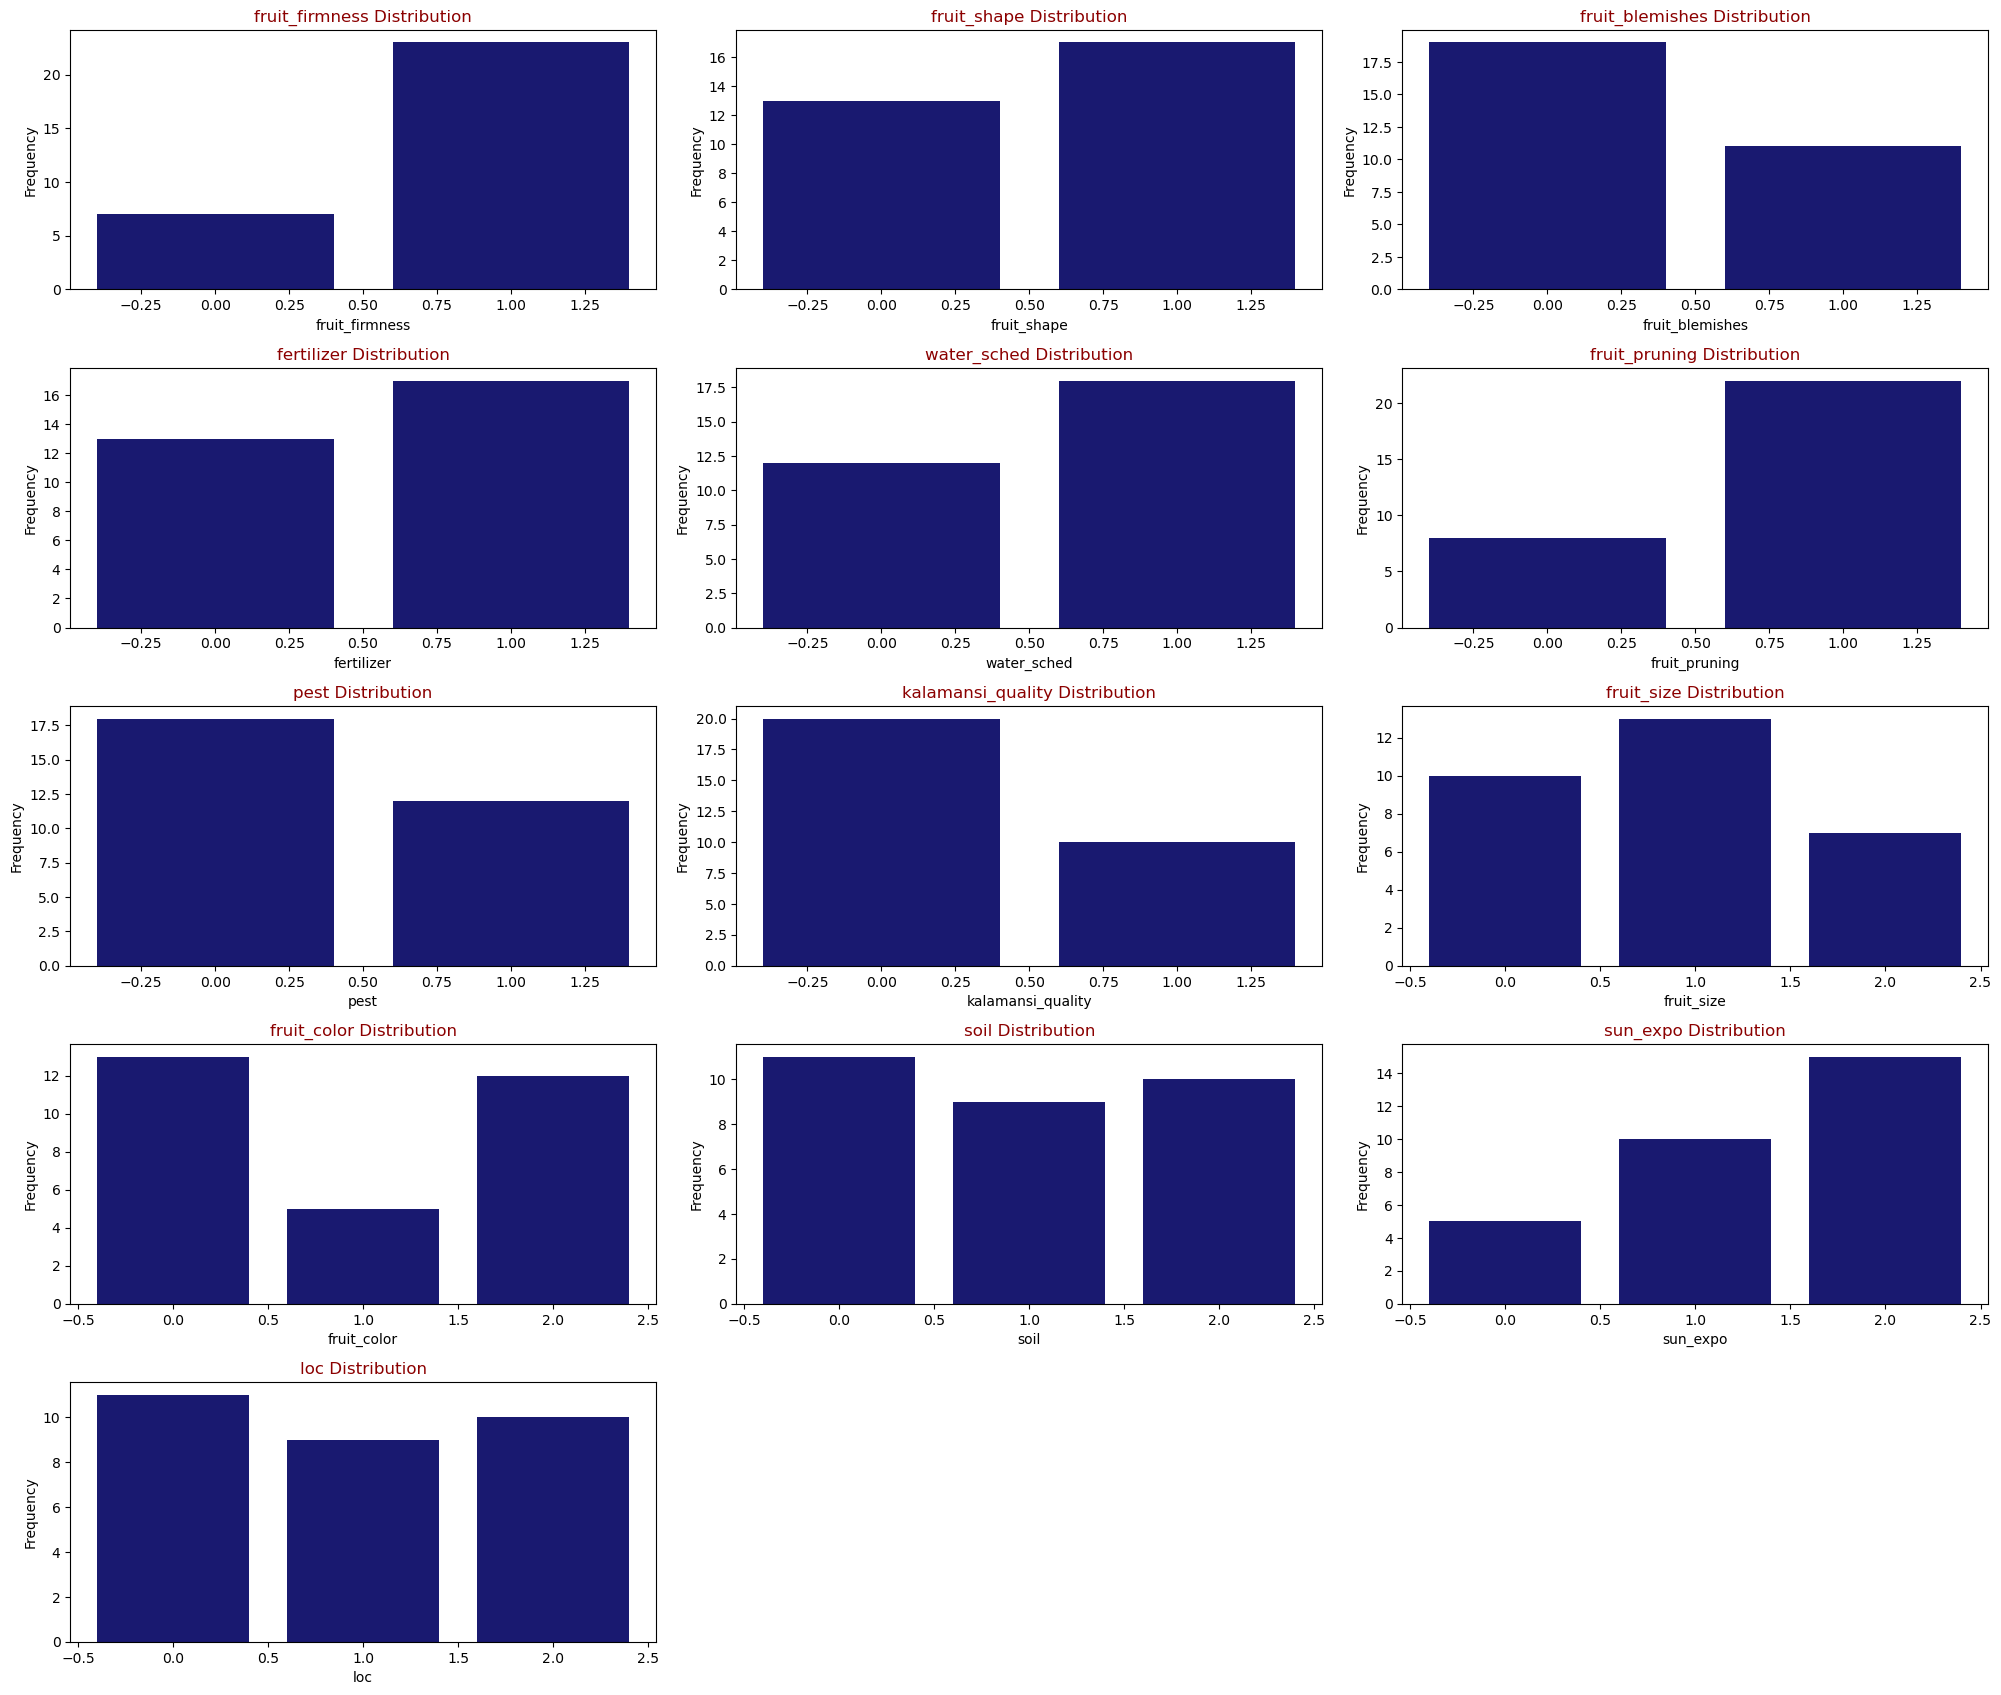

In [14]:
def draw_bar_charts(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20, 20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        counts = dataframe[feature].value_counts().sort_values(ascending=False)  # Get counts for each value

        # Create the bar chart with appropriate labels and colors
        bars = ax.bar(counts.index, counts.values, color='midnightblue')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.set_title(feature + " Distribution", color='DarkRed')

    fig.tight_layout()
    plt.show()

draw_bar_charts(kalamansi, kalamansi.columns, 6, 3)

In [15]:
kalamansi.kalamansi_quality.value_counts()

kalamansi_quality
0    20
1    10
Name: count, dtype: int64

<Axes: xlabel='kalamansi_quality', ylabel='count'>

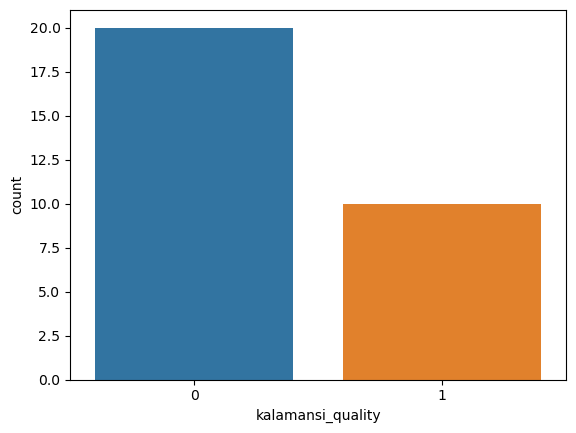

In [16]:
sn.countplot(x = 'kalamansi_quality', data = kalamansi)

There are 20 low quality kalamansi and 10 high quality kalamansi.

In [17]:
kalamansi.head()

,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality,fruit_size,fruit_color,soil,sun_expo,loc
kalamansi_id,,,,,,,,,,,,,
0,0,0,0,0,1,1,1,0,0,2,1,0,0
1,1,1,0,1,1,1,0,1,1,0,0,2,0
2,0,0,0,0,1,0,1,0,0,1,1,1,1
3,1,1,0,1,0,1,0,1,1,2,2,2,2
4,1,1,1,0,0,1,0,0,0,1,1,0,1


### Splitting Data to Train and Test Split

In [18]:
import sklearn
x = kalamansi[['fruit_firmness', 'fruit_shape', 'fruit_blemishes', 'fertilizer', 'water_sched', 'fruit_pruning', 'pest', 'fruit_size', 'fruit_color', 'soil', 'sun_expo', 'loc']]
y = kalamansi['kalamansi_quality']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 5)

# split the data X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42) 
# X_train: independent/input feature data for training the model 
# y_train: dependent/output feature data for training the model 
# X_test: independent/input feature data for testing the model; will be used to predict the output values 
# y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model. 
# test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set 
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [20]:
import joblib

joblib.dump(log_reg, 'kalamansi_logreg.pkl')  # Save the MODEL 

['kalamansi_logreg.pkl']

### Prediction

In [21]:
predict = log_reg.predict(x_test)

In [22]:
y_test.values

array([0, 1, 0, 0, 1, 1], dtype=int64)

In [23]:
predict

array([0, 1, 0, 0, 1, 1], dtype=int64)

### Model Evaluation

In [24]:
# Model Performance

pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,3,0
Actual Yes,0,3


In [25]:
# Model Accuracy
from sklearn.metrics import accuracy_score

In [26]:
sklearn.metrics.accuracy_score(y_test,predict)

1.0

In [27]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [29]:
kalamansi.head(6)

,fruit_firmness,fruit_shape,fruit_blemishes,fertilizer,water_sched,fruit_pruning,pest,kalamansi_quality,fruit_size,fruit_color,soil,sun_expo,loc
kalamansi_id,,,,,,,,,,,,,
0,0,0,0,0,1,1,1,0,0,2,1,0,0
1,1,1,0,1,1,1,0,1,1,0,0,2,0
2,0,0,0,0,1,0,1,0,0,1,1,1,1
3,1,1,0,1,0,1,0,1,1,2,2,2,2
4,1,1,1,0,0,1,0,0,0,1,1,0,1
5,1,0,1,0,1,0,1,0,1,0,2,2,1


#### Exporting Model

In [30]:
# Load the model from file

loaded_model = joblib.load('kalamansi_logreg.pkl')

In [30]:
data = ['fruit_firmness', 'fruit_shape', 'fruit_blemishes', 'fertilizer', 'water_sched', 'fruit_pruning', 'pest', 'fruit_size', 'fruit_color', 'soil', 'sun_expo', 'loc']
test = [[1,1,0,1,0,1,0,1,2,2,2,2]]
test_df = pd.DataFrame(test, columns=data)

In [31]:
result = loaded_model.predict(test_df)

In [32]:
result

array([1], dtype=int64)